In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

max_features = 10000
max_len = 500
batch_size = 32

print('loading data...')
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=max_features)

print(len(train_data),'train sequeces')
print(len(test_data),'test sequeces')

train_data = pad_sequences(train_data, maxlen=max_len)
test_data = pad_sequences(test_data, maxlen=max_len)

print('train data shape:',train_data.shape)
print('test data shape:',test_data.shape)

Using TensorFlow backend.


loading data...
25000 train sequeces
25000 test sequeces
train data shape: (25000, 500)
test data shape: (25000, 500)


In [2]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features,128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1 ,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


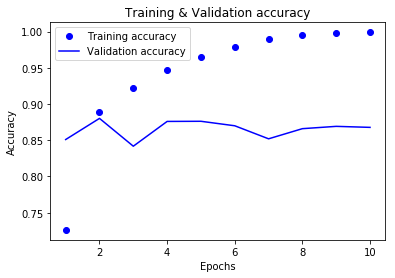

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
print(history_dict.keys())

epochs = range(1,len(history_dict['acc'])+1)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values,'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values,'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

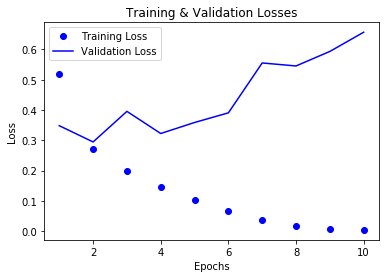

In [4]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history_dict['loss'])+1)

plt.plot(epochs, loss_values,'bo', label='Training Loss')
plt.plot(epochs, val_loss_values,'b', label='Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()